In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [0]:
from google.colab import drive
drive.mount('/content/drive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data ='/content/drive/My Drive/Colab Notebooks/LARP_ASS1/Dataset_1_Team_29.csv'


In [0]:
x=pd.read_csv(data)
x1=x.iloc[:,1].values
x2=x.iloc[:,2].values



In [0]:
x


,Unnamed: 0,X1,X2
0,sample1,57,67
1,sample2,93,83
2,sample3,77,49
3,sample4,19,21
4,sample5,92,77
5,sample6,35,45
6,sample7,46,32
7,sample8,100,88
8,sample9,22,37
9,sample10,81,84


In [0]:
# x1_bar=np.mean(x1)
# x2_bar=np.mean(x2)
# x1_bar,x2_bar

(49.14, 49.18)

In [0]:
# x1_std=np.std(x1)
# x2_std=np.std(x2)
# x1_std,x2_std

(28.361248209484717, 26.704823534335514)

In [0]:
# x1_mean_adjusted=(x1-x1_bar)/x1_std
# x2_mean_adjusted=(x2-x2_bar)/x2_std
X=np.vstack([x1,x2])
X.shape
# X5=np.transpose(X)
# X5

(2, 50)

In [0]:
Covariance=np.dot(X,np.transpose(X))
# Covariance=Covariance/50
Covariance

array([[160955, 156495],
       [156495, 156591]])

In [0]:
# Covariance=np.cov(X,bias=True)
eigvals,eigvecs=np.linalg.eigh(Covariance)
eigvecs
eigvals
# Covariance

array([  2262.78899446, 315283.21100554])

In [0]:

origin = [50], [50] 

In [0]:
k1=eigvecs[:,0]

k2=eigvecs[:,1]

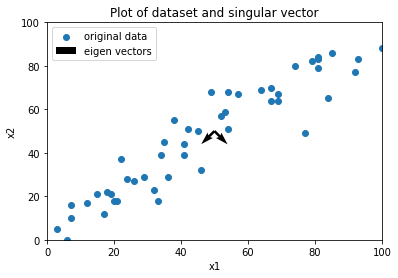

In [0]:
plt.scatter(x1, x2,label='original data')
plt.title('Plot of dataset and singular vector')
plt.xlabel('x1')
plt.ylabel('x2')
plt.ylim(0,100)
plt.xlim(0,100)
# plt.plot(eigvecs[0,:],label='eigen vectors')
# plt.plot(k1,k2)
plt.quiver(*origin,k1,k2,label='eigen vectors')
plt.legend()
plt.show()

In [0]:
idx = eigvals.argsort()[::-1]   
print(idx)
eigvals = eigvals[idx]
eigvecs = eigvecs[idx,:]
eigvals
eigvecs


[1 0]


array([[-0.71201881, -0.70216039],
       [ 0.70216039, -0.71201881]])

In [0]:
# scalar=np.matmul(np.transpose(eigvecs[0,:]),X)
scalar=np.dot(eigvecs[0,:],X)
# # scalar=np.ravel(scalar)
scalar=np.reshape(scalar,[1,50])
print('scalar',scalar.shape)
vect=np.reshape(eigvecs[0,:],[2,1])
projected=(vect*scalar)
projected.shape
projected=np.transpose(projected)

# projected=np.dot(scalar,np.transpose(vect))

scalar (1, 50)


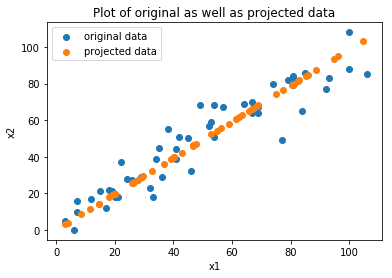

In [0]:
plt.scatter(x1, x2,label='original data')
plt.title('Plot of original as well as projected data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(projected[:,0], projected[:,1],label='projected data')
plt.legend()
plt.show()

In [0]:
error=np.sum(eigvals[1])
error

2262.78899445571

In [0]:
#least square solution
X=np.reshape(x1,[50,1])
Y=np.reshape(x2,[50,1])

M=np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X),X)),np.transpose(X)),Y)
L=np.matmul(X,M)


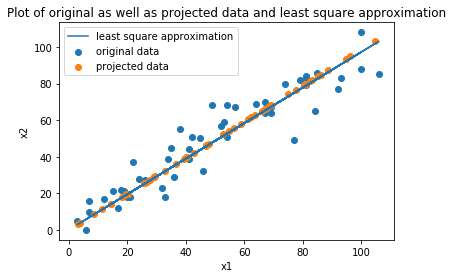

In [0]:
plt.scatter(x1, x2,label='original data')
plt.title('Plot of original as well as projected data and least square approximation')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(projected[:,0], projected[:,1],label='projected data')
plt.plot(X,L,label='least square approximation')
plt.legend()
plt.show()

In [0]:
diff=Y-L
err_OLS=(np.linalg.norm(diff,2)**2)/50

     
      

In [0]:
err_OLS

88.64830294181606